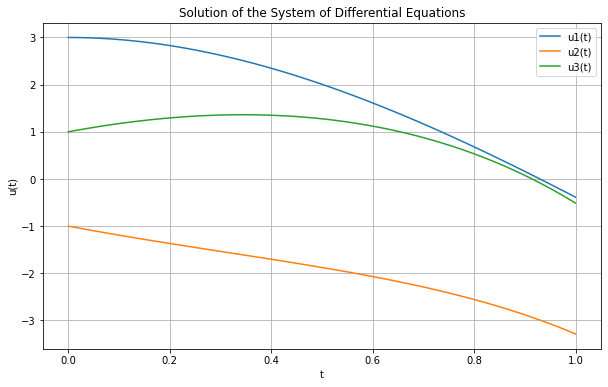

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def rk4(f, t0, y0, t_end, n):
    dt = (t_end - t0) / n
    t = np.linspace(t0, t_end, n+1)
    y = np.zeros((n+1, len(y0)))
    y[0] = y0
    
    for i in range(n):
        k1 = dt * f(t[i], y[i])
        k2 = dt * f(t[i] + dt/2, y[i] + k1/2)
        k3 = dt * f(t[i] + dt/2, y[i] + k2/2)
        k4 = dt * f(t[i] + dt, y[i] + k3)
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return t, y

def system(t, y):
    u1, u2, u3 = y
    return np.array([
        u1 + 2*u2 - 2*u3 + np.exp(-t),
        u2 + u3 - 2*np.exp(-t),
        u1 + 2*u2 + np.exp(-t)
    ])

t0, t_end, n = 0, 1, 100
y0 = np.array([3, -1, 1])

t, y = rk4(system, t0, y0, t_end, n)

plt.figure(figsize=(10, 6))
plt.plot(t, y[:, 0], label='u1(t)')
plt.plot(t, y[:, 1], label='u2(t)')
plt.plot(t, y[:, 2], label='u3(t)')
plt.title('Solution of the System of Differential Equations')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()
plt.grid(True)
plt.show()